In [8]:
import pandas as pd
import numpy as np
import os
from geopy.distance import geodesic

In [9]:
folder_path = '/Users/annele/PycharmProjects/Glas-O-Mat/data'

'''df_ConstraintsContainerSites = pd.read_csv(os.path.join(folder_path, 'ConstraintsContainerSites.csv'))'''
df_ConstructionTypes = pd.read_csv(os.path.join(folder_path, 'ConstructionTypes.csv'))
df_ContainerActivities = pd.read_csv(os.path.join(folder_path, 'ContainerActivities.csv'))
df_ContainerActivities_filtered = pd.read_csv(os.path.join(folder_path, 'modified_data/ContainerActivities_filtered.csv')) 
df_ContainerCountHistory = pd.read_csv(os.path.join(folder_path, 'ContainerCountHistory.csv'))
df_ContainerLocationAttributes = pd.read_csv(os.path.join(folder_path, 'ContainerLocationAttributes.csv'))
df_Containers = pd.read_csv(os.path.join(folder_path, 'Containers.csv'))
df_Customers = pd.read_csv(os.path.join(folder_path, 'Customers.csv'))
df_DefaultVehicleAvailability = pd.read_csv(os.path.join(folder_path, 'DefaultVehicleAvailability.csv'))
df_DistanceMatrix = pd.read_csv(os.path.join(folder_path, 'DistanceMatrix.csv'))
df_Locations = pd.read_csv(os.path.join(folder_path, 'Locations.csv'))
df_MaterialTypes = pd.read_csv(os.path.join(folder_path, 'MaterialTypes.csv'))
df_Phones = pd.read_csv(os.path.join(folder_path, 'Phones.csv'))
df_SpecialLocationAttributes = pd.read_csv(os.path.join(folder_path, 'SpecialLocationAttributes.csv'))

In [10]:
df_ContainerActivities_cleaned_coordinates = pd.read_csv(os.path.join(folder_path, 'modified_data/ContainerActivities_cleaned_coordinates.csv'))

/var/folders/hp/y7wgcxwd5s7ff9cjh270v5v40000gp/T/ipykernel_11843/2929015851.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ContainerActivities_cleaned_coordinates = pd.read_csv(os.path.join(folder_path, 'modified_data/ContainerActivities_cleaned_coordinates.csv'))


In [11]:
df_ContainerActivities_cleaned_coordinates

,Unnamed: 0,TRANSACTION_ID,CONTAINER_ID,SLIDER_LEVEL,CV_LEVEL,SENSOR_LEVEL,IMAGE_ID,PHONE_ID,RECORDED_AT,COMMENT,...,GEO_LAT,GEO_LON,DATE,CLASSIFICATION,outlier,DISTANCE,NEW_LAT,NEW_LON,NEW_DISTANCE,INACCURATE_COORDINATES
0,0,1,1001101101100271111,30,NaN,NaN,1001101101100271111/2023-09-28T06:36:48.022095...,TP1A.220624.014_2,2023-09-26 06:36:48.0,NaN,...,49.456130,7.791667,2023-09-26,accurate,False,20.382686,49.456130,7.791667,0.0,False
1,1,2,1001101101100271211,20,NaN,NaN,1001101101100271211/2023-09-28T06:36:05.355751...,TP1A.220624.014_2,2023-09-26 06:36:05.0,NaN,...,49.456130,7.791667,2023-09-26,accurate,False,20.382686,49.456130,7.791667,0.0,False
2,2,3,1001101101100271311,10,NaN,NaN,1001101101100271311/2023-09-28T06:37:16.029149...,TP1A.220624.014_2,2023-09-26 06:37:16.0,NaN,...,49.456130,7.791667,2023-09-26,accurate,False,20.382686,49.456130,7.791667,0.0,False
3,3,4,1001101101100191111,0,NaN,NaN,1001101101100191111/2023-09-28T06:51:15.117682...,TP1A.220624.014_2,2023-09-26 06:51:15.0,NaN,...,49.448608,7.769743,2023-09-26,accurate,False,8.700529,49.448608,7.769743,0.0,False
4,4,5,1001101101100191211,10,NaN,NaN,1001101101100191211/2023-09-28T06:51:43.824174...,TP1A.220624.014_2,2023-09-26 06:51:44.0,NaN,...,49.448608,7.769743,2023-09-26,accurate,False,8.700529,49.448608,7.769743,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35525,35916,61150,1001101101100531112,90,NaN,NaN,1001101101100531112/2024-10-17T14:47:10.767846...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:47:11.0,NaN,...,49.440841,7.708089,2024-10-17,NaN,NaN,NaN,49.440841,7.708089,0.0,True
35526,35917,61151,1001101101100531211,20,NaN,NaN,1001101101100531211/2024-10-17T14:46:43.691739...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:46:44.0,NaN,...,49.440841,7.708089,2024-10-17,NaN,NaN,NaN,49.440841,7.708089,0.0,True
35527,35918,61152,1001101101100531212,90,NaN,NaN,1001101101100531212/2024-10-17T14:46:54.523517...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:46:55.0,NaN,...,49.440841,7.708089,2024-10-17,NaN,NaN,NaN,49.440841,7.708089,0.0,True
35528,35919,61153,1001101101100531311,20,NaN,NaN,1001101101100531311/2024-10-17T14:47:19.611355...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:47:20.0,NaN,...,49.440841,7.708089,2024-10-17,NaN,NaN,NaN,49.440841,7.708089,0.0,True


# Clean locations

In [12]:
import pandas as pd

# 1. Stellen Sie sicher, dass 'DATE' als Datumsformat vorliegt
df_ContainerActivities_cleaned_coordinates['DATE'] = pd.to_datetime(df_ContainerActivities_cleaned_coordinates['DATE'])

df_ContainerActivities_cleaned_coordinates['LOCATION_ID'] = df_ContainerActivities_cleaned_coordinates['LOCATION_ID'].astype(str)

# 2. Sortieren des DataFrames nach 'LOCATION_ID' und 'DATE'
df_ContainerActivities_cleaned_coordinates = df_ContainerActivities_cleaned_coordinates.sort_values(['LOCATION_ID', 'RECORDED_AT'])

# 3. Erstellen von verschobenen LAT und LONG, um Änderungen zu erkennen
df_ContainerActivities_cleaned_coordinates['LAT_SHIFT'] = df_ContainerActivities_cleaned_coordinates.groupby('LOCATION_ID')['NEW_LAT'].shift()
df_ContainerActivities_cleaned_coordinates['LONG_SHIFT'] = df_ContainerActivities_cleaned_coordinates.groupby('LOCATION_ID')['NEW_LON'].shift()

# 4. Identifizieren von Koordinatenänderungen
df_ContainerActivities_cleaned_coordinates['COORD_CHANGED'] = (df_ContainerActivities_cleaned_coordinates['NEW_LAT'] != df_ContainerActivities_cleaned_coordinates['LAT_SHIFT']) | (df_ContainerActivities_cleaned_coordinates['NEW_LON'] != df_ContainerActivities_cleaned_coordinates['LONG_SHIFT'])

# 5. Gruppennummern zuweisen, wenn sich die Koordinaten ändern
df_ContainerActivities_cleaned_coordinates['GROUP'] = df_ContainerActivities_cleaned_coordinates.groupby('LOCATION_ID')['COORD_CHANGED'].cumsum()

# 6. Gruppieren nach 'LOCATION_ID' und 'GROUP', um Start- und Enddatum sowie Koordinaten zu erhalten
df_Locations = df_ContainerActivities_cleaned_coordinates.groupby(['LOCATION_ID', 'GROUP']).agg(
    LOCATION_ID=('LOCATION_ID', 'first'),
    START_DATUM=('DATE', 'min'),
    END_DATUM=('DATE', 'max'),
    LAT=('NEW_LAT', 'first'),
    LONG=('NEW_LON', 'first')
).reset_index(drop=True)

df_Locations.to_csv(os.path.join(folder_path, 'modified_data/Locations_cleaned.csv'), index=False)
df_Locations


,LOCATION_ID,START_DATUM,END_DATUM,LAT,LONG
0,100110110110001,2023-09-27,2024-10-17,49.404778,7.726918
1,100110110110002,2023-10-05,2024-10-10,49.407417,7.733458
2,100110110110003,2023-10-05,2023-12-13,49.403217,7.727401
3,100110110110003,2023-12-19,2024-01-11,49.402963,7.727028
4,100110110110003,2024-01-17,2024-10-17,49.403217,7.727401
...,...,...,...,...,...
597,100110110210128,2024-01-22,2024-08-16,49.480278,7.622694
598,100110110210129,2023-09-28,2024-10-15,49.483722,7.624139
599,100110110210130,2024-02-29,2024-03-28,49.437512,7.531113
600,100110110210130,2024-04-05,2024-08-09,49.437560,7.528855


# Nearest Container

In [13]:
# Funktion zur Berechnung der Haversine-Distanz (Geopy)
def calculate_distances(row, locations):
    """
    Berechnet die Distanz zu allen anderen Standorten und gibt die Location ID 
    und die minimale Distanz zurück.
    """
    current_location = (row['LAT'], row['LONG'])
    
    # Berechne Distanzen zu allen anderen Standorten
    distances = locations.apply(
        lambda loc: geodesic(current_location, (loc['LAT'], loc['LONG'])).meters
        if row['LOCATION_ID'] != loc['LOCATION_ID'] else np.inf, axis=1
    )
    
    # Finde den nächsten Standort
    nearest_index = distances.idxmin()
    nearest_location_id = locations.loc[nearest_index, 'LOCATION_ID']
    nearest_distance = distances.min()
    
    return pd.Series({'NEAREST_LOCATION_ID': nearest_location_id, 'DISTANCE_METERS': nearest_distance})

In [14]:
# Berechnung für jede Location ID
result = df_Locations.apply(calculate_distances, locations=df_Locations, axis=1)

# Ergebnis mit der ursprünglichen Tabelle zusammenfügen
df_Locations = pd.concat([df_Locations, result], axis=1)

# Ausgabe
df_Locations

,LOCATION_ID,START_DATUM,END_DATUM,LAT,LONG,NEAREST_LOCATION_ID,DISTANCE_METERS
0,100110110110001,2023-09-27,2024-10-17,49.404778,7.726918,100110110110003,177.114408
1,100110110110002,2023-10-05,2024-10-10,49.407417,7.733458,100110110110001,558.057479
2,100110110110003,2023-10-05,2023-12-13,49.403217,7.727401,100110110110001,177.114408
3,100110110110003,2023-12-19,2024-01-11,49.402963,7.727028,100110110110001,201.999157
4,100110110110003,2024-01-17,2024-10-17,49.403217,7.727401,100110110110001,177.114408
...,...,...,...,...,...,...,...
597,100110110210128,2024-01-22,2024-08-16,49.480278,7.622694,100110110210129,397.092536
598,100110110210129,2023-09-28,2024-10-15,49.483722,7.624139,100110110210128,397.092536
599,100110110210130,2024-02-29,2024-03-28,49.437512,7.531113,100110110210036,1513.876278
600,100110110210130,2024-04-05,2024-08-09,49.437560,7.528855,100110110210036,1379.353765


In [16]:
df_Locations.columns

Index(['LOCATION_ID', 'START_DATUM', 'END_DATUM', 'LAT', 'LONG',
       'NEAREST_LOCATION_ID', 'DISTANCE_METERS'],
      dtype='object')

# Feature Engineering

## Get Fill Level Growth

In [15]:
# Sicherstellen, dass DATE als Datentyp datetime ist
df_ContainerActivities_cleaned_coordinates['DATE'] = pd.to_datetime(df_ContainerActivities_cleaned_coordinates['DATE'])

# Sortieren nach LOCATION_ID, CONTAINER_ID und DATE
df = df_ContainerActivities_cleaned_coordinates.sort_values(by=['LOCATION_ID', 'CONTAINER_ID', 'DATE'])

# Berechnung der Füllrate
def calculate_fill_rate(group):
    # Kopie des Levels erstellen, um Anpassungen vorzunehmen
    group['SLIDER_LEVEL_temp'] = group['SLIDER_LEVEL'].copy()
    slider_level = group['SLIDER_LEVEL'].copy()
    slider_level_temp = group['SLIDER_LEVEL_temp'].copy()
    
    # Wenn der Container geleert wurde, setze den Slider-Level des Vortages auf 0
    slider_level_temp = slider_level_temp.where(group['IS_EMPTIED'] != 1, 0)

    # Differenz des Levels berechnen (aktueller Tag - vorheriger Tag)
    group['FILL_RATE'] = slider_level - slider_level_temp.shift(1)

    # Der erste Wert jeder Gruppe hat keine Füllrate
    group['FILL_RATE'].iloc[0] = None
    return group

# Gruppieren und die Füllrate berechnen
df_ContainerActivities_cleaned_coordinates = df_ContainerActivities_cleaned_coordinates.groupby(['LOCATION_ID', 'CONTAINER_ID'], group_keys=False).apply(calculate_fill_rate)

df_ContainerActivities_cleaned_coordinates.drop('SLIDER_LEVEL_temp', axis=1, inplace=True)

df_ContainerActivities_cleaned_coordinates

/var/folders/hp/y7wgcxwd5s7ff9cjh270v5v40000gp/T/ipykernel_11843/731545866.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group['FILL_RATE'].iloc[0] = None
/var/folders/hp/y7wgcxwd5s7ff9cjh270v5v40000gp/T/ipykernel_11843/731545866.py:2

,Unnamed: 0,TRANSACTION_ID,CONTAINER_ID,SLIDER_LEVEL,CV_LEVEL,SENSOR_LEVEL,IMAGE_ID,PHONE_ID,RECORDED_AT,COMMENT,...,DISTANCE,NEW_LAT,NEW_LON,NEW_DISTANCE,INACCURATE_COORDINATES,LAT_SHIFT,LONG_SHIFT,COORD_CHANGED,GROUP,FILL_RATE
136,136,218,1001101101100011211,30,NaN,NaN,1001101101100011211/2023-09-29T09:34:41.966841...,TP1A.220624.014_2,2023-09-27 09:34:42.0,NaN,...,18.344643,49.404778,7.726918,0.0,False,NaN,NaN,True,1,NaN
135,135,217,1001101101100011111,50,NaN,NaN,1001101101100011111/2023-09-29T09:34:59.668033...,TP1A.220624.014_2,2023-09-27 09:35:00.0,NaN,...,18.344643,49.404778,7.726918,0.0,False,49.404778,7.726918,False,1,NaN
137,137,219,1001101101100011311,30,NaN,NaN,1001101101100011311/2023-09-29T09:35:17.394681...,TP1A.220624.014_2,2023-09-27 09:35:17.0,NaN,...,18.344643,49.404778,7.726918,0.0,False,49.404778,7.726918,False,1,NaN
616,616,1176,1001101101100011211,30,NaN,NaN,1001101101100011211/2023-10-07T09:24:16.409639...,TP1A.220624.014_2,2023-10-05 09:24:16.0,NaN,...,17.887946,49.404778,7.726918,0.0,False,49.404778,7.726918,False,1,30.0
615,615,1175,1001101101100011111,40,NaN,NaN,1001101101100011111/2023-10-07T09:24:26.821226...,TP1A.220624.014_2,2023-10-05 09:24:27.0,NaN,...,17.887946,49.404778,7.726918,0.0,False,49.404778,7.726918,False,1,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34804,35195,60429,1001101102101301112,10,NaN,NaN,1001101102101301112/2024-10-10T08:56:11.482912...,TP1A.220624.014_9ce1a15a4bdc6fe5,2024-10-10 08:56:11.0,NaN,...,NaN,49.437512,7.531113,0.0,True,49.437512,7.531113,False,3,10.0
34805,35196,60430,1001101102101301211,0,NaN,NaN,1001101102101301211/2024-10-10T08:56:21.991198...,TP1A.220624.014_9ce1a15a4bdc6fe5,2024-10-10 08:56:22.0,NaN,...,NaN,49.437512,7.531113,0.0,True,49.437512,7.531113,False,3,0.0
35435,35826,61060,1001101102101301111,50,NaN,NaN,1001101102101301111/2024-10-17T09:11:54.369752...,TP1A.220624.014_9ce1a15a4bdc6fe5,2024-10-17 09:11:54.0,NaN,...,NaN,49.437512,7.531113,0.0,True,49.437512,7.531113,False,3,50.0
35436,35827,61061,1001101102101301112,0,NaN,NaN,1001101102101301112/2024-10-17T09:12:02.353910...,TP1A.220624.014_9ce1a15a4bdc6fe5,2024-10-17 09:12:02.0,NaN,...,NaN,49.437512,7.531113,0.0,True,49.437512,7.531113,False,3,0.0


In [17]:
df_Locations.rename(columns={'LAT': 'NEW_LAT', 'LONG': 'NEW_LON'}, inplace=True)

df_ContainerActivities_cleaned_coordinates = df_ContainerActivities_cleaned_coordinates.merge(
    df_Locations[['LOCATION_ID', 'NEW_LAT', 'NEW_LON', 'NEAREST_LOCATION_ID', 'DISTANCE_METERS']],
    on=['LOCATION_ID', 'NEW_LAT', 'NEW_LON'], 
    how='left'
)

In [18]:
df_ContainerActivities_cleaned_coordinates

,Unnamed: 0,TRANSACTION_ID,CONTAINER_ID,SLIDER_LEVEL,CV_LEVEL,SENSOR_LEVEL,IMAGE_ID,PHONE_ID,RECORDED_AT,COMMENT,...,NEW_LON,NEW_DISTANCE,INACCURATE_COORDINATES,LAT_SHIFT,LONG_SHIFT,COORD_CHANGED,GROUP,FILL_RATE,NEAREST_LOCATION_ID,DISTANCE_METERS
0,136,218,1001101101100011211,30,NaN,NaN,1001101101100011211/2023-09-29T09:34:41.966841...,TP1A.220624.014_2,2023-09-27 09:34:42.0,NaN,...,7.726918,0.0,False,NaN,NaN,True,1,NaN,100110110110003,177.114408
1,135,217,1001101101100011111,50,NaN,NaN,1001101101100011111/2023-09-29T09:34:59.668033...,TP1A.220624.014_2,2023-09-27 09:35:00.0,NaN,...,7.726918,0.0,False,49.404778,7.726918,False,1,NaN,100110110110003,177.114408
2,137,219,1001101101100011311,30,NaN,NaN,1001101101100011311/2023-09-29T09:35:17.394681...,TP1A.220624.014_2,2023-09-27 09:35:17.0,NaN,...,7.726918,0.0,False,49.404778,7.726918,False,1,NaN,100110110110003,177.114408
3,616,1176,1001101101100011211,30,NaN,NaN,1001101101100011211/2023-10-07T09:24:16.409639...,TP1A.220624.014_2,2023-10-05 09:24:16.0,NaN,...,7.726918,0.0,False,49.404778,7.726918,False,1,30.0,100110110110003,177.114408
4,615,1175,1001101101100011111,40,NaN,NaN,1001101101100011111/2023-10-07T09:24:26.821226...,TP1A.220624.014_2,2023-10-05 09:24:27.0,NaN,...,7.726918,0.0,False,49.404778,7.726918,False,1,40.0,100110110110003,177.114408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69791,35826,61060,1001101102101301111,50,NaN,NaN,1001101102101301111/2024-10-17T09:11:54.369752...,TP1A.220624.014_9ce1a15a4bdc6fe5,2024-10-17 09:11:54.0,NaN,...,7.531113,0.0,True,49.437512,7.531113,False,3,50.0,100110110210036,1513.876278
69792,35827,61061,1001101102101301112,0,NaN,NaN,1001101102101301112/2024-10-17T09:12:02.353910...,TP1A.220624.014_9ce1a15a4bdc6fe5,2024-10-17 09:12:02.0,NaN,...,7.531113,0.0,True,49.437512,7.531113,False,3,0.0,100110110210036,1513.876278
69793,35827,61061,1001101102101301112,0,NaN,NaN,1001101102101301112/2024-10-17T09:12:02.353910...,TP1A.220624.014_9ce1a15a4bdc6fe5,2024-10-17 09:12:02.0,NaN,...,7.531113,0.0,True,49.437512,7.531113,False,3,0.0,100110110210036,1513.876278
69794,35828,61062,1001101102101301211,0,NaN,NaN,1001101102101301211/2024-10-17T09:12:10.945904...,TP1A.220624.014_9ce1a15a4bdc6fe5,2024-10-17 09:12:11.0,NaN,...,7.531113,0.0,True,49.437512,7.531113,False,3,0.0,100110110210036,1513.876278


In [20]:
df_ContainerActivities_cleaned_coordinates.columns

Index(['Unnamed: 0', 'TRANSACTION_ID', 'CONTAINER_ID', 'SLIDER_LEVEL',
       'CV_LEVEL', 'SENSOR_LEVEL', 'IMAGE_ID', 'PHONE_ID', 'RECORDED_AT',
       'COMMENT', 'IS_EMPTIED', 'LATITUDE', 'LONGITUDE', 'CREATED_AT',
       'UPDATED_AT', 'ROUTE_ID', 'LOCATION_ID', 'GEO_LAT', 'GEO_LON', 'DATE',
       'CLASSIFICATION', 'outlier', 'DISTANCE', 'NEW_LAT', 'NEW_LON',
       'NEW_DISTANCE', 'INACCURATE_COORDINATES', 'LAT_SHIFT', 'LONG_SHIFT',
       'COORD_CHANGED', 'GROUP', 'FILL_RATE', 'NEAREST_LOCATION_ID',
       'DISTANCE_METERS'],
      dtype='object')

## Feature Analysis

Erklärte Varianz der Hauptkomponenten: [0.53518802 0.46481198]


/var/folders/hp/y7wgcxwd5s7ff9cjh270v5v40000gp/T/ipykernel_11843/3826853786.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, cmap='viridis')


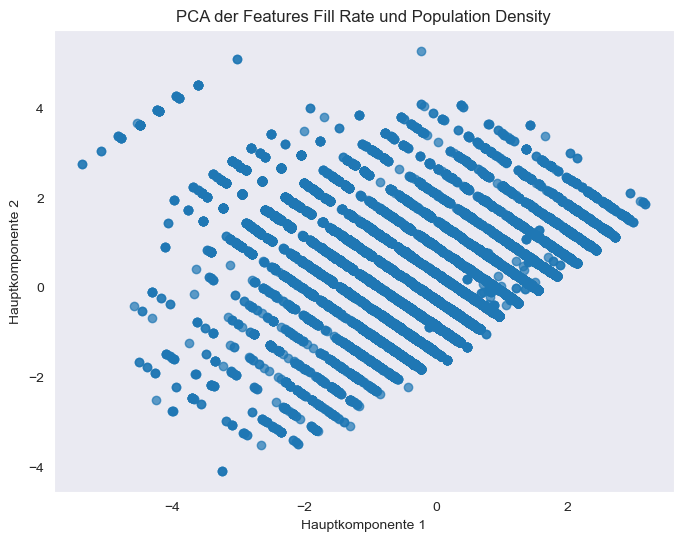

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Relevante numerische Features auswählen
features = ['FILL_RATE', 'DISTANCE_METERS']
X = df_ContainerActivities_cleaned_coordinates[features]

# 2. NaN-Werte entfernen
X = X.dropna()

# 3. Daten skalieren (Standardisierung)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA durchführen
pca = PCA(n_components=2)  # Reduzierung auf 2 Hauptkomponenten
X_pca = pca.fit_transform(X_scaled)

# 5. Ergebnisse analysieren
explained_variance_ratio = pca.explained_variance_ratio_

print("Erklärte Varianz der Hauptkomponenten:", explained_variance_ratio)

# 6. Ergebnisse visualisieren
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, cmap='viridis')
plt.title('PCA der Features Fill Rate und Population Density')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.grid()
plt.show()

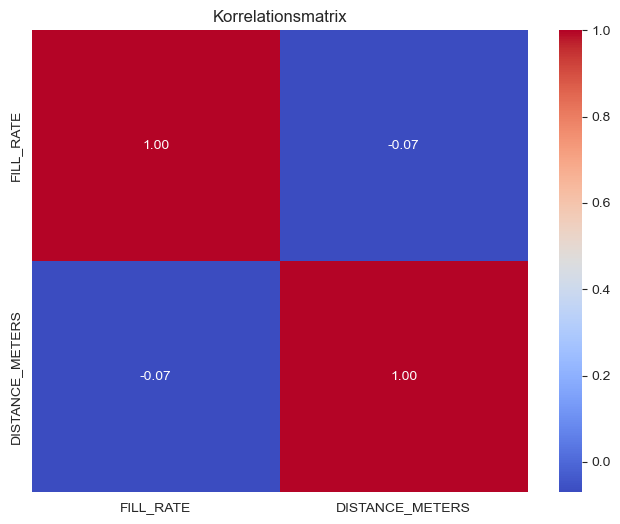

In [24]:
correlation_matrix = df_ContainerActivities_cleaned_coordinates[features].corr()
# pearson correlation coefficient
# spearman
# supermarkt schauen welcher kooefizient passt
# Korrelationsmatrix visualisieren
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix")
plt.show()